<a href="https://colab.research.google.com/github/Danii-Sh/Adversarial_Saliency/blob/main/Adversarial__mnist_FGSM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

# New Section

In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
cd Adversarial_jamshid_idea/

/content/drive/MyDrive/Adversarial_jamshid_idea


In [ ]:
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:00


In [ ]:
import sys
sys.argv=['']
del sys

In [ ]:
import torch
import torchvision.models as models

In [ ]:
!pip install foolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision.models as models
import numpy as np
import eagerpy as ep
from foolbox import PyTorchModel, accuracy, samples
import foolbox as fb
from foolbox.attacks import FGSM, LinfPGD

In [ ]:
import torch
import torchvision.models as models

#resnet = models.resnet152(pretrained=True)
#model = resnet.eval()

In [ ]:
cd ..

/content/drive/MyDrive


In [ ]:
ls

In [ ]:
cd Saliency_k_adjust_MNIST0

/content/drive/MyDrive/Saliency_k_adjust_MNIST0


In [ ]:
ls

 cnn.py               model_089.pt                  model_mnist_51273.pt
 data/                model_090.pt                  model_mnist_512_74.pt
 grads.pt             model_091.pt                  model_mnist_51274.pt
 Helper.py            model_092.pt                  model_mnist_51275.pt
 interpretable.py     model_093.pt                  model_mnist_51276.pt
 k0                   model_094.pt                  model_mnist_51277.pt
 k1                   model_095.pt                  model_mnist_51278.pt
 k10                  model_096.pt                  model_mnist_51279.pt
 k11                  model_097.pt                  model_mnist_51280.pt
 k12                  model_098.pt                  model_mnist_51281.pt
 k13                  model_099.pt                  model_mnist_51282.pt
 k14                  Model_Best_0_5.pt             model_mnist_51283.pt
 k15                 'model_mnist_512_0.5 _0.pt'    model_mnist_51284.pt
 k16                 'model_mnist_512_0.5 _10.pt' 

In [ ]:
model_without = torch.load("model_without89.pt", map_location=torch.device('cpu'))

In [ ]:
# Calculate the mean
mean_t = torch.mean(images_)

# Print the mean
print("Mean:", mean_t.item())

Mean: 0.005889657884836197


In [ ]:
# Calculate the mean
std_t = torch.std(images_)

# Print the mean
print("std:", std_t.item())

std: 1.007725715637207


In [ ]:
# Calculate the mean
min_t = torch.min(images_)

# Print the mean
print("min:", min_t.item())

min: -0.4242129623889923


In [ ]:
# Calculate the mean
max_t = torch.max(images_)

# Print the mean
print("max:", max_t.item())

max: 2.821486711502075


In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy
import foolbox as fb
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import numpy as np
import torch

# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST test dataset with the defined transform
test_dataset = MNIST(root='path/to/dataset', train=False, download=True, transform=transform)

# Create a PyTorch model
model = model_without  # Your MNIST model initialization here

# Create the Foolbox model
fmodel = PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075))

# Prepare the test samples
images = []
labels = []
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    images.append(image)
    labels.append(label)

# Convert the test samples to PyTorch tensors
images_ = torch.stack(images)
labels_ = torch.tensor(labels)

# Convert the PyTorch tensors to eagerpy tensors
images__ = ep.astensor(images_)
labels__ = ep.astensor(labels_)
print("images.shape", images__.shape)
print("labels.shape", labels__.shape)

# Calculate clean accuracy
clean_acc = accuracy(fmodel, images__, labels__)
print(f"Clean accuracy: {clean_acc * 100:.1f}%")


images.shape torch.Size([10000, 1, 28, 28])
labels.shape torch.Size([10000])
Clean accuracy: 99.3%


In [ ]:
def generate_list(num_elements):
    step = 1 / (num_elements - 1)
    elements = [i * step for i in range(num_elements)]
    return elements


In [ ]:
my_list = generate_list(11)
print(my_list)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


In [ ]:
# Perform the attack
attack = fb.attacks.FGSM()
epsilons = my_list
advss, advs, success = attack(fmodel, images__, labels__, epsilons=epsilons)

In [ ]:
successs = torch.zeros((11,10000))

for l in range(11):
  for m in range(10000):
      successs[l][m]=success[l][m].item()

In [ ]:
import torch

# Assuming you have a tensor named 'tensor' with shape (2000,) containing boolean values
num_true_list = []
# Count the number of True values in the tensor
for l in range(11):
    num_true = torch.sum(successs[l]).item()
    print("Number of True values:", num_true)
    num_true_list.append(num_true)


Number of True values: 73.0
Number of True values: 220.0
Number of True values: 483.0
Number of True values: 916.0
Number of True values: 1526.0
Number of True values: 2264.0
Number of True values: 2927.0
Number of True values: 3538.0
Number of True values: 4049.0
Number of True values: 4454.0
Number of True values: 4709.0


In [ ]:
import torch

# Assuming you have a tensor named 'tensor' with shape (2000,) containing boolean values
num_true_list = []
# Count the number of True values in the tensor
for l in range(11):
    num_true = torch.sum(successs[l]).item()
    print("Number of True values:", num_true)
    num_true_list.append(num_true)


Number of True values: 73.0
Number of True values: 220.0
Number of True values: 483.0
Number of True values: 916.0
Number of True values: 1526.0
Number of True values: 2264.0
Number of True values: 2927.0
Number of True values: 3538.0
Number of True values: 4049.0
Number of True values: 4454.0
Number of True values: 4709.0


In [ ]:
Label = []
predicted = []
for i in range(10000):
    #print(pic[i].shape)
    y= images[i].unsqueeze(0)
    #print(y.shape)
    output = model(y)
    predicted_label = torch.argmax(output, dim=1).item()
    predicted.append(predicted_label)
    label_= labels[i]
    Label.append(label_)
    if i % 1000==0:
      print("sample",i,"predict",predicted[i], "Label", Label[i])

sample 0 predict 7 Label 7
sample 1000 predict 9 Label 9
sample 2000 predict 6 Label 6
sample 3000 predict 6 Label 6
sample 4000 predict 9 Label 9
sample 5000 predict 3 Label 3
sample 6000 predict 9 Label 9
sample 7000 predict 1 Label 1
sample 8000 predict 4 Label 4
sample 9000 predict 7 Label 7


In [ ]:
adversarial = torch.zeros((10000,1, 28, 28))
for m in range(10000):
  for i in range(1):
    for j in range(28):
      for k in range(28):
        adversarial[m][i][j][k]=advs[10][m][i][j][k].item()

In [ ]:
adversarial_label = []
adversarial_All = []
for i in range(10000):
    #adver= adversarial[i].unsqueeze(0).cuda()
    adver= adversarial[i].unsqueeze(0)

    adversarial_All.append(adver)
    output_adver = model(adver)
    predicted_adver = torch.argmax(output_adver, dim=1).item()
    adversarial_label.append(predicted_adver)
    if i % 1000==0:
       print("sample",i,"predict",predicted[i],"adversaral",adversarial_label[i], "Label", Label[i])

sample 0 predict 7 adversaral 7 Label 7
sample 1000 predict 9 adversaral 8 Label 9
sample 2000 predict 6 adversaral 8 Label 6
sample 3000 predict 6 adversaral 8 Label 6
sample 4000 predict 9 adversaral 8 Label 9
sample 5000 predict 3 adversaral 8 Label 3
sample 6000 predict 9 adversaral 3 Label 9
sample 7000 predict 1 adversaral 8 Label 1
sample 8000 predict 4 adversaral 4 Label 4
sample 9000 predict 7 adversaral 7 Label 7


In [ ]:
pic_ = torch.permute(images[5000],(1,2,0))

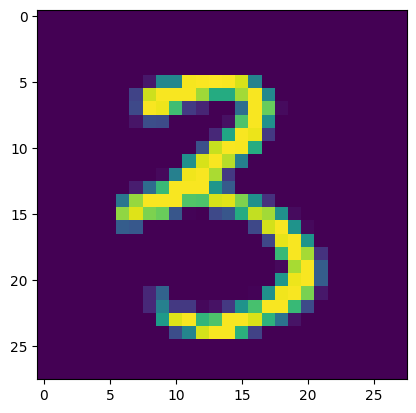

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(pic_)

In [ ]:
adversarial_ = torch.permute(adversarial[5000],(1,2,0))

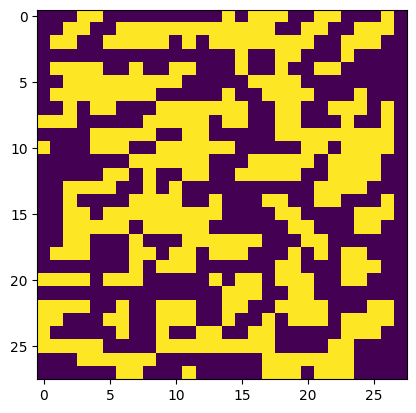

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(adversarial_)

In [ ]:
adversarial_s = torch.zeros((10,1, 28, 28))
for m in range(10):
  for i in range(1):
    for j in range(28):
      for k in range(28):
        adversarial_s[m][i][j][k]=advs[m][6000][i][j][k].item()

In [ ]:
adversarial_s_label = []
adversarial_s_All = []
for i in range(10):
    #adver= adversarial[i].unsqueeze(0).cuda()
    adver= adversarial_s[i].unsqueeze(0)

    adversarial_s_All.append(adver)
    output_adver = model(adver)
    predicted_adver = torch.argmax(output_adver, dim=1).item()
    adversarial_s_label.append(predicted_adver)
    print("sample",i,"predict",predicted[6000],"adversaral",adversarial_s_label[i], "Label", Label[6000])

sample 0 predict 9 adversaral 9 Label 9
sample 1 predict 9 adversaral 4 Label 9
sample 2 predict 9 adversaral 3 Label 9
sample 3 predict 9 adversaral 3 Label 9
sample 4 predict 9 adversaral 3 Label 9
sample 5 predict 9 adversaral 3 Label 9
sample 6 predict 9 adversaral 3 Label 9
sample 7 predict 9 adversaral 3 Label 9
sample 8 predict 9 adversaral 3 Label 9
sample 9 predict 9 adversaral 3 Label 9


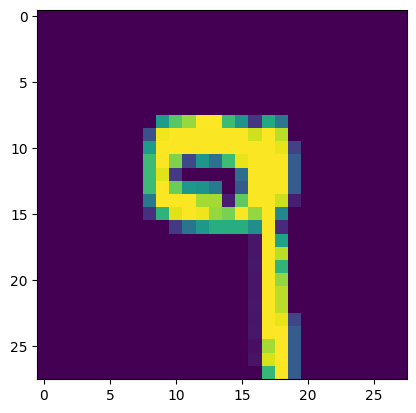

In [ ]:
adversarial_ss = torch.permute(adversarial_s[0],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy
import foolbox as fb
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import numpy as np
import torch

# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST test dataset with the defined transform
from torch.utils.data import random_split

# Load the full MNIST dataset
full_dataset = MNIST(
    root='path/to/dataset',
    train=False,
    download=True,
    transform=transform
)

# Split the full dataset into training and testing datasets
train_size = int(0.8 * len(full_dataset))  # 80% for training
test_size = len(full_dataset) - train_size  # Remaining 20% for testing
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create a PyTorch model
model = model_without  # Your MNIST model initialization here

# Create the Foolbox model
#fmodel_t = PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075))
fmodel = PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075))
"""

# Prepare the test samples
images_t = []
labels_t = []
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    images_t.append(image)
    labels_t.append(label)

# Convert the test samples to PyTorch tensors
images_t = torch.stack(images_t)
labels_t = torch.tensor(labels_t)

# Convert the PyTorch tensors to eagerpy tensors
images__t = ep.astensor(images_t)
labels__t = ep.astensor(labels_t)
print("images.shape", images__t.shape)
print("labels.shape", labels__t.shape)

# Calculate clean accuracy
clean_acc_t = accuracy(fmodel_t, images__t, labels__t)
print(f"Clean accuracy on train: {clean_acc_t * 100:.1f}%")
"""

# Prepare the test samples
images = []
labels = []
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    images.append(image)
    labels.append(label)

# Convert the test samples to PyTorch tensors
images_ = torch.stack(images)
labels_ = torch.tensor(labels)

# Convert the PyTorch tensors to eagerpy tensors
images__ = ep.astensor(images_)
labels__ = ep.astensor(labels_)
print("images.shape", images__.shape)
print("labels.shape", labels__.shape)

# Calculate clean accuracy
clean_acc = accuracy(fmodel, images__, labels__)
print(f"Clean accuracy: {clean_acc * 100:.1f}%")


images.shape torch.Size([2000, 1, 28, 28])
labels.shape torch.Size([2000])
Clean accuracy: 99.2%


In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy
import foolbox as fb
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import numpy as np
import torch

# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST test dataset with the defined transform
from torch.utils.data import random_split

train_dataset = MNIST(
    root='path/to/dataset',
    train=True,
    download=True,
    transform=transform
)

test_dataset = MNIST(
    root='path/to/dataset',
    train=False,
    download=True,
    transform=transform
)

# Create a PyTorch model
model = model_without  # Your MNIST model initialization here

# Create the Foolbox model
#fmodel_t = PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075))
fmodel = PyTorchModel(model, bounds=(-0.4242129623889923, 2.821486711502075))


# Prepare the test samples
images_t = []
labels_t = []
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    images_t.append(image)
    labels_t.append(label)

# Convert the test samples to PyTorch tensors
images_t = torch.stack(images_t)
labels_t = torch.tensor(labels_t)

# Convert the PyTorch tensors to eagerpy tensors
images__t = ep.astensor(images_t)
labels__t = ep.astensor(labels_t)
print("images.shape", images__t.shape)
print("labels.shape", labels__t.shape)

# Calculate clean accuracy
clean_acc_t = accuracy(fmodel, images__t, labels__t)
print(f"Clean accuracy on train: {clean_acc_t * 100:.1f}%")


# Prepare the test samples
images = []
labels = []
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    images.append(image)
    labels.append(label)

# Convert the test samples to PyTorch tensors
images_ = torch.stack(images)
labels_ = torch.tensor(labels)

# Convert the PyTorch tensors to eagerpy tensors
images__ = ep.astensor(images_)
labels__ = ep.astensor(labels_)
print("images.shape", images__.shape)
print("labels.shape", labels__.shape)

# Calculate clean accuracy
clean_acc = accuracy(fmodel, images__, labels__)
print(f"Clean accuracy: {clean_acc * 100:.1f}%")



images.shape torch.Size([60000, 1, 28, 28])
labels.shape torch.Size([60000])
Clean accuracy on train: 100.0%
images.shape torch.Size([10000, 1, 28, 28])
labels.shape torch.Size([10000])
Clean accuracy: 99.3%


In [ ]:
len(adversarial)

10000

In [ ]:
adversarial.shape


torch.Size([10000, 1, 28, 28])

In [ ]:
Label_tensor = torch.tensor(Label)


In [ ]:
print(Label_tensor[0])

tensor(7)


In [ ]:
adversarial_label_tensor = torch.tensor(Label_tensor).unsqueeze(1)

<ipython-input-98-f2c7a1215b51>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adversarial_label_tensor = torch.tensor(Label_tensor).unsqueeze(1)


In [ ]:
adversarial_label_tensor[0].item()

7

In [ ]:
adversarial_label_tensor[0]

tensor(7)

In [ ]:
list_label=[]

In [ ]:
adversarial_label_tensor

tensor([[7],
        [2],
        [1],
        ...,
        [4],
        [5],
        [6]])

In [ ]:
for i in range(len(adversarial_label_tensor)):
  list_label.append(adversarial_label_tensor[i].item())

In [ ]:
Label_tensor_ = torch.tensor(list_label)


In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import ConcatDataset

# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the main MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
#testset = torchvision.datasets.MNIST(root='./data', train=False,
#                                     download=True, transform=transform)

# Load the adversarial images
adversarial_dataset = torch.utils.data.TensorDataset(adversarial, Label_tensor_)

# Concatenate the main dataset and the adversarial dataset
combined_dataset = ConcatDataset([trainset, adversarial_dataset])

# Create a data loader for the combined dataset
dataloader = torch.utils.data.DataLoader(combined_dataset, batch_size=64, shuffle=True)

# Iterate over the combined dataset
for images, labels in trainset:
    # Use the images and labels for training or further processing
    # Each batch will contain a mix of main and adversarial images
    #print(labels)
    pass


In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import ConcatDataset

# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the main MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)

# Convert adversarial_All to a PyTorch tensor
adversarial_All_tensor = torch.tensor(adversarial)

# Create the adversarial dataset with integer labels
adversarial_dataset = [(image, label) for image, label in zip(adversarial_All_tensor, adversarial_label)]

# Concatenate the main dataset, test dataset, and adversarial dataset
combined_dataset = ConcatDataset([trainset, testset] + adversarial_dataset)

# Create a data loader for the combined dataset
dataloader = torch.utils.data.DataLoader(combined_dataset, batch_size=64, shuffle=True)

# Iterate over the combined dataset
for images, labels in adversarial_dataset:
    # Use the images and labels for training or further processing
    # Each batch will contain a mix of main and adversarial images
    pass


<ipython-input-94-1a612682a5bd>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adversarial_All_tensor = torch.tensor(adversarial)


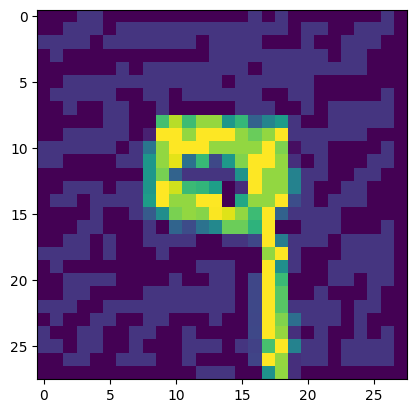

In [ ]:
adversarial_ss = torch.permute(adversarial_s[1],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

In [ ]:
adversarial_ss = torch.permute(adversarial_s[2],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

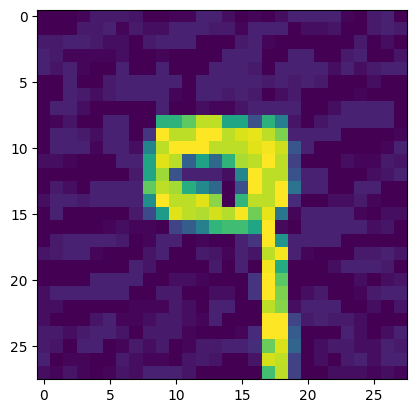

In [ ]:
adversarial_ss = torch.permute(adversarial_s[3],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

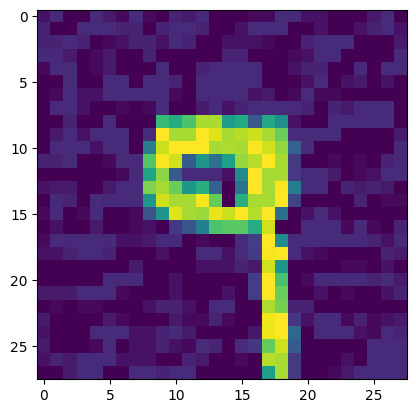

In [ ]:
adversarial_ss = torch.permute(adversarial_s[4],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

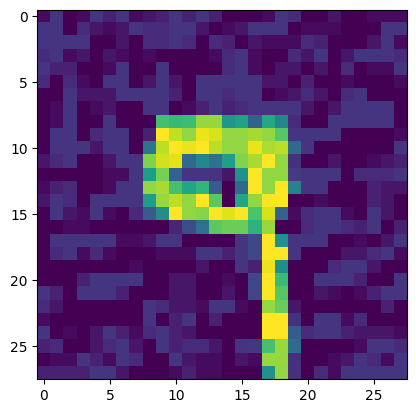

In [ ]:
adversarial_ss = torch.permute(adversarial_s[5],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

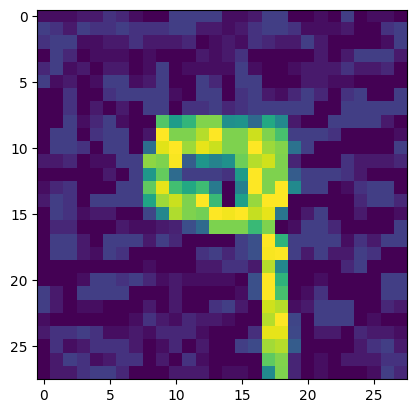

In [ ]:
adversarial_ss = torch.permute(adversarial_s[6],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

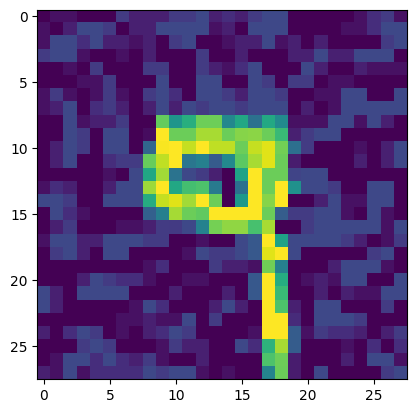

In [ ]:
adversarial_ss = torch.permute(adversarial_s[7],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

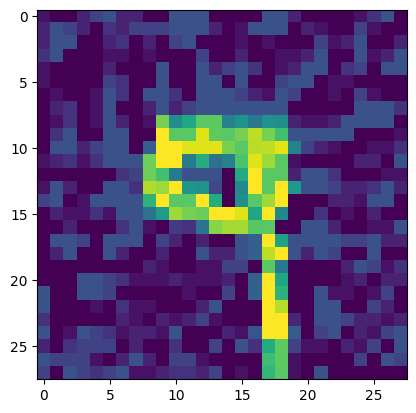

In [ ]:
adversarial_ss = torch.permute(adversarial_s[8],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

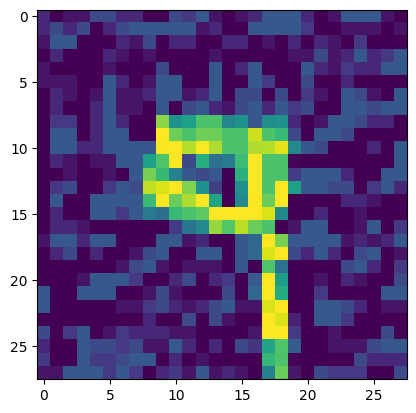

In [ ]:
adversarial_ss = torch.permute(adversarial_s[9],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

In [ ]:
ls

In [ ]:
success.shape

torch.Size([11, 10000])

In [ ]:
cd ..

/content/drive/MyDrive


In [ ]:
cd Salinecy_k_adjust_MNIST

/content/drive/MyDrive/Salinecy_k_adjust_MNIST


In [ ]:
ls

cnn.py              model50.pt               model_updated_499.pt
data/               model60.pt               model_updated_50.pt
Helper.py           model70.pt               model_updated_510.pt
interpretable.py    model80.pt               model_updated_520.pt
k149                model90.pt               model_updated_530.pt
k_307/              Model_Best392.pt         model_updated_540.pt
k99                 Model_Best_4_392.pt      model_updated_550.pt
maskedAcc_MNIST.py  Model_Best.pt            model_updated_560.pt
model0.pt           Model_Best_updated_4.pt  model_updated_570.pt
model100.pt         Model_Best_updated_5.pt  model_updated_580.pt
model10.pt          model_k40.pt             model_updated_581.pt
model110.pt         models/                  model_updated_582.pt
model120.pt         model_updated_40.pt      model_updated_583.pt
model130.pt         model_updated_410.pt     model_updated_584.pt
model140.pt         model_updated_420.pt     model_updated_585.pt
model20.pt 

In [ ]:
model_saliency = torch.load("model_updated_593.pt", map_location=torch.device('cpu'))

In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy
import foolbox as fb
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import numpy as np
import torch

# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST test dataset with the defined transform
test_dataset = MNIST(root='path/to/dataset', train=False, download=True, transform=transform)

# Create a PyTorch model
model_saliency = model_saliency  # Your MNIST model initialization here

# Create the Foolbox model
fmodel_saliency = PyTorchModel(model_saliency, bounds=(-0.4242129623889923, 2.821486711502075))

# Prepare the test samples
images_saliency = []
labels_saliency = []
for i in range(len(test_dataset)):
    image_saliency, label_saliency = test_dataset[i]
    images_saliency.append(image_saliency)
    labels_saliency.append(label_saliency)

# Convert the test samples to PyTorch tensors
images__saliency = torch.stack(images_saliency)
labels__saliency = torch.tensor(labels_saliency)

# Convert the PyTorch tensors to eagerpy tensors
images___saliency = ep.astensor(images__saliency)
labels___saliency = ep.astensor(labels__saliency)
print("images.shape", images___saliency.shape)
print("labels.shape", labels___saliency.shape)

# Calculate clean accuracy
clean_acc_saliency = accuracy(fmodel_saliency, images___saliency, labels___saliency)
print(f"Clean accuracy: {clean_acc_saliency * 100:.1f}%")


/usr/local/lib/python3.10/dist-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


images.shape torch.Size([10000, 1, 28, 28])
labels.shape torch.Size([10000])
Clean accuracy: 98.8%


In [ ]:
# Perform the attack
attack = fb.attacks.FGSM()
epsilons = my_list
advss_saliency, advs_saliency, success_saliency = attack(fmodel_saliency, images___saliency, labels___saliency, epsilons=epsilons)

In [ ]:
successs_saliency = torch.zeros((11,10000))

for l in range(11):
  for m in range(10000):
      successs_saliency[l][m]=success_saliency[l][m].item()

In [ ]:
import torch

# Assuming you have a tensor named 'tensor' with shape (2000,) containing boolean values
num_true_saliency_list = []
# Count the number of True values in the tensor
for l in range(11):
    num_true_saliency = torch.sum(successs_saliency[l]).item()
    num_true_saliency_list.append(num_true_saliency)

    print("Number of True values:", num_true_saliency)

Number of True values: 144.0
Number of True values: 373.0
Number of True values: 789.0
Number of True values: 1483.0
Number of True values: 2422.0
Number of True values: 3567.0
Number of True values: 4390.0
Number of True values: 5215.0
Number of True values: 5879.0
Number of True values: 6319.0
Number of True values: 6675.0


In [ ]:
Label_s = []
predicted_s = []
for i in range(10000):
    #print(pic[i].shape)
    y_s= images_saliency[i].unsqueeze(0)
    #print(y.shape)
    output_s = fmodel_saliency(y_s)
    predicted_label_s = torch.argmax(output_s, dim=1).item()
    predicted_s.append(predicted_label_s)
    label_s= labels[i]
    Label_s.append(label_s)
    if i % 1000==0:
      print("sample",i,"predict",predicted_s[i], "Label", Label_s[i])

sample 0 predict 7 Label 7
sample 1000 predict 9 Label 9
sample 2000 predict 6 Label 6
sample 3000 predict 6 Label 6
sample 4000 predict 9 Label 9
sample 5000 predict 3 Label 3
sample 6000 predict 9 Label 9
sample 7000 predict 1 Label 1
sample 8000 predict 4 Label 4
sample 9000 predict 7 Label 7


In [ ]:
adversarial_saliency = torch.zeros((10000,1, 28, 28))
for m in range(10000):
  for i in range(1):
    for j in range(28):
      for k in range(28):
        adversarial_saliency[m][i][j][k]=advs_saliency[10][m][i][j][k].item()

In [ ]:
adversarial_label_saliency = []
adversarial_All_saliency = []
for i in range(10000):
    #adver= adversarial[i].unsqueeze(0).cuda()
    adver_saliency= adversarial_saliency[i].unsqueeze(0)

    adversarial_All_saliency.append(adver_saliency)
    output_adver_saliency = model_saliency(adver_saliency)
    predicted_adver_saliency = torch.argmax(output_adver_saliency, dim=1).item()
    adversarial_label_saliency.append(predicted_adver_saliency)
    if i % 1000==0:
       print("sample",i,"predict",predicted_s[i],"adversaral",adversarial_label_saliency[i], "Label", Label_s[i])

sample 0 predict 7 adversaral 3 Label 7
sample 1000 predict 9 adversaral 2 Label 9
sample 2000 predict 6 adversaral 8 Label 6
sample 3000 predict 6 adversaral 8 Label 6
sample 4000 predict 9 adversaral 8 Label 9
sample 5000 predict 3 adversaral 5 Label 3
sample 6000 predict 9 adversaral 7 Label 9
sample 7000 predict 1 adversaral 7 Label 1
sample 8000 predict 4 adversaral 2 Label 4
sample 9000 predict 7 adversaral 2 Label 7


In [ ]:
adversarial_saliency  = torch.permute(adversarial_saliency[5000],(1,2,0))

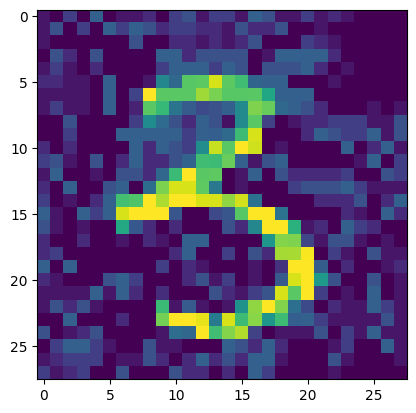

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(adversarial_saliency)

In [ ]:
adversarial_s_saliency = torch.zeros((10,1, 28, 28))
for m in range(10):
  for i in range(1):
    for j in range(28):
      for k in range(28):
        adversarial_s_saliency[m][i][j][k]=advs_saliency[m][6000][i][j][k].item()

In [ ]:
adversarial_s_label_saliency = []
adversarial_s_All_saliency = []
for i in range(10):
    #adver= adversarial[i].unsqueeze(0).cuda()
    adver= adversarial_s_saliency[i].unsqueeze(0)

    adversarial_s_All_saliency.append(adver)
    output_adver = model_saliency(adver)
    predicted_adver = torch.argmax(output_adver, dim=1).item()
    adversarial_s_label_saliency.append(predicted_adver)
    print("sample",i,"predict",predicted[6000],"adversaral",adversarial_s_label_saliency[i], "Label", Label[6000])

sample 0 predict 9 adversaral 9 Label 9
sample 1 predict 9 adversaral 9 Label 9
sample 2 predict 9 adversaral 4 Label 9
sample 3 predict 9 adversaral 7 Label 9
sample 4 predict 9 adversaral 7 Label 9
sample 5 predict 9 adversaral 7 Label 9
sample 6 predict 9 adversaral 7 Label 9
sample 7 predict 9 adversaral 7 Label 9
sample 8 predict 9 adversaral 7 Label 9
sample 9 predict 9 adversaral 7 Label 9


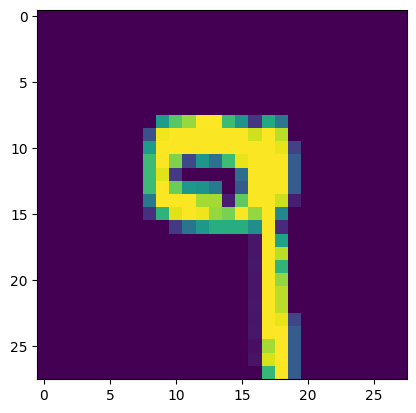

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[0],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

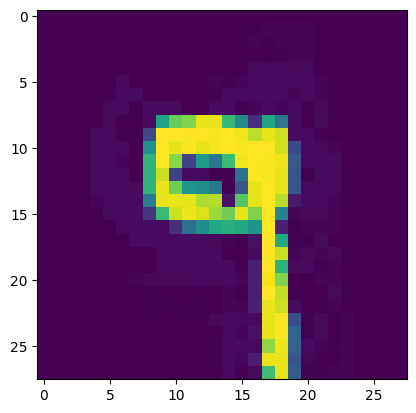

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[1],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

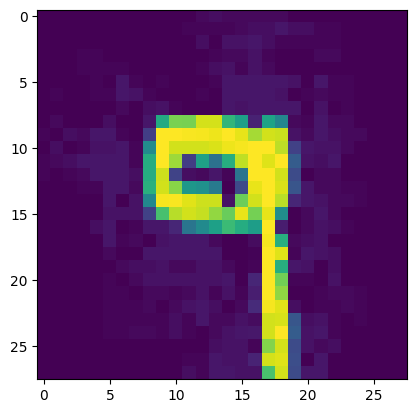

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[2],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

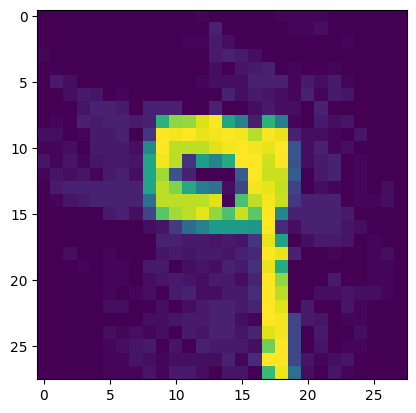

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[3],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

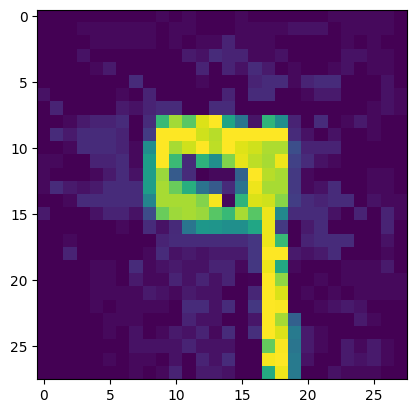

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[4],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

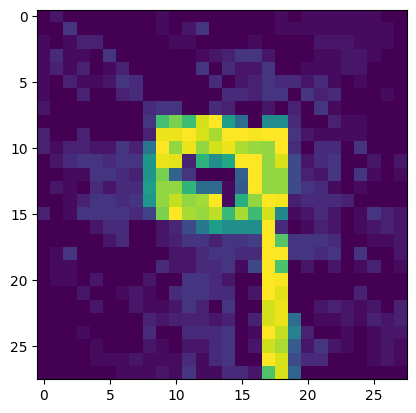

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[5],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

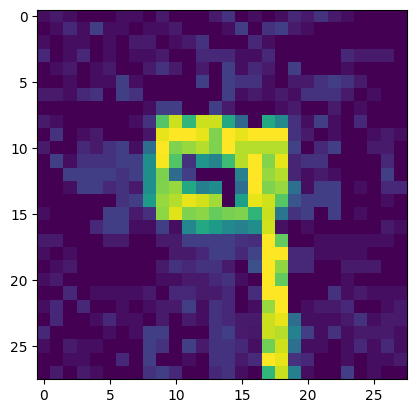

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[6],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

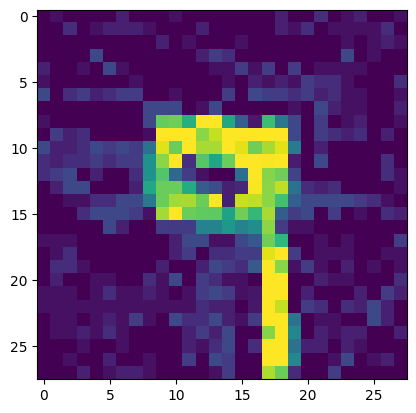

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[7],(1,2,0))
import matplotlib.pyplot as plT

plt.imshow(adversarial_ss)

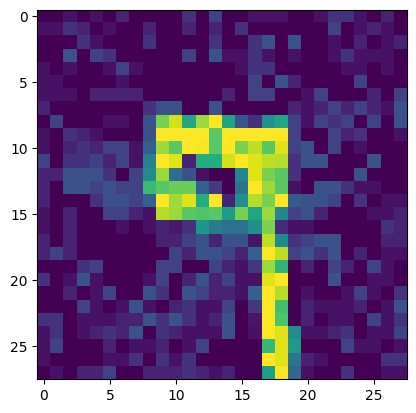

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[8],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

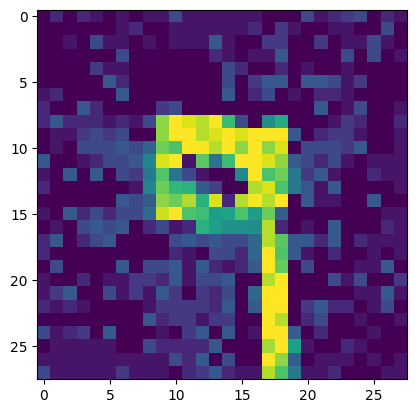

In [ ]:
adversarial_ss = torch.permute(adversarial_s_saliency[9],(1,2,0))
import matplotlib.pyplot as plt

plt.imshow(adversarial_ss)

In [ ]:
print(num_true_list)

[73.0, 220.0, 483.0, 916.0, 1526.0, 2264.0, 2927.0, 3538.0, 4049.0, 4454.0, 4709.0]


In [ ]:
print(num_true_saliency_list)

[144.0, 373.0, 789.0, 1483.0, 2422.0, 3567.0, 4390.0, 5215.0, 5879.0, 6319.0, 6675.0]


In [ ]:
num_true_list = [73.0, 220.0, 483.0, 916.0, 1526.0, 2264.0, 2927.0, 3538.0, 4049.0, 4454.0, 4709.0]


In [ ]:
num_true_saliency_list = [144.0, 373.0, 789.0, 1483.0, 2422.0, 3567.0, 4390.0, 5215.0, 5879.0, 6319.0, 6675.0]


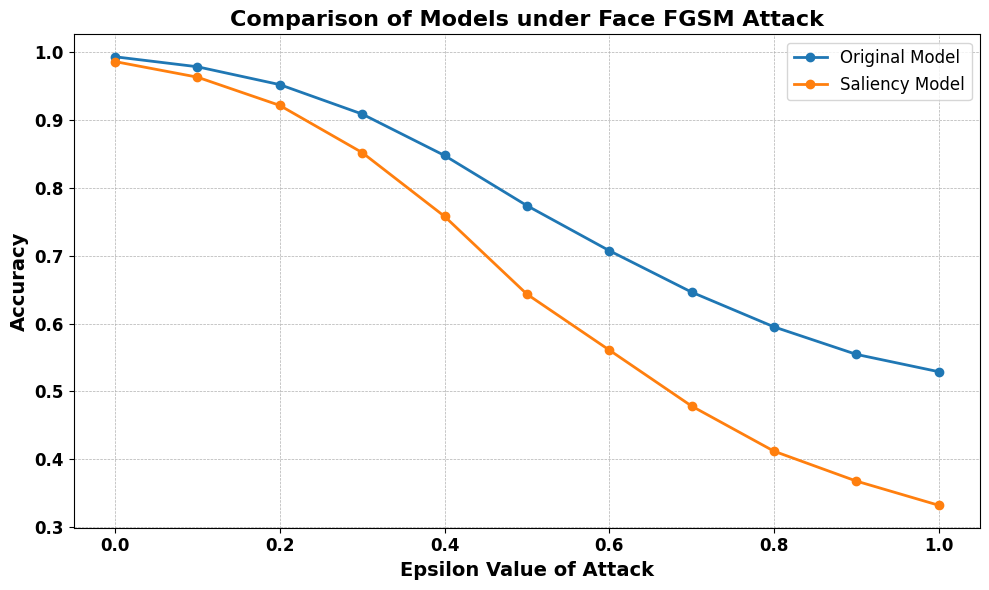

In [ ]:
import matplotlib.pyplot as plt

# Assuming that my_list, num_true_list, and num_true_saliency_list have been defined
thresholds = my_list
accuracy_original = [(10000 - num) / 10000 for num in num_true_list]
accuracy_saliency = [(10000 - num) / 10000 for num in num_true_saliency_list]

plt.figure(figsize=(10,6), tight_layout=True)
plt.plot(thresholds, accuracy_original, 'o-', linewidth=2, label='Original Model')
plt.plot(thresholds, accuracy_saliency, 'o-', linewidth=2, label='Saliency Model')

# Adjusting the font size and font weight for the plot elements
plt.xlabel('Epsilon Value of Attack', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Comparison of Models under Face FGSM Attack', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')

# Increasing the tick label size
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.show()


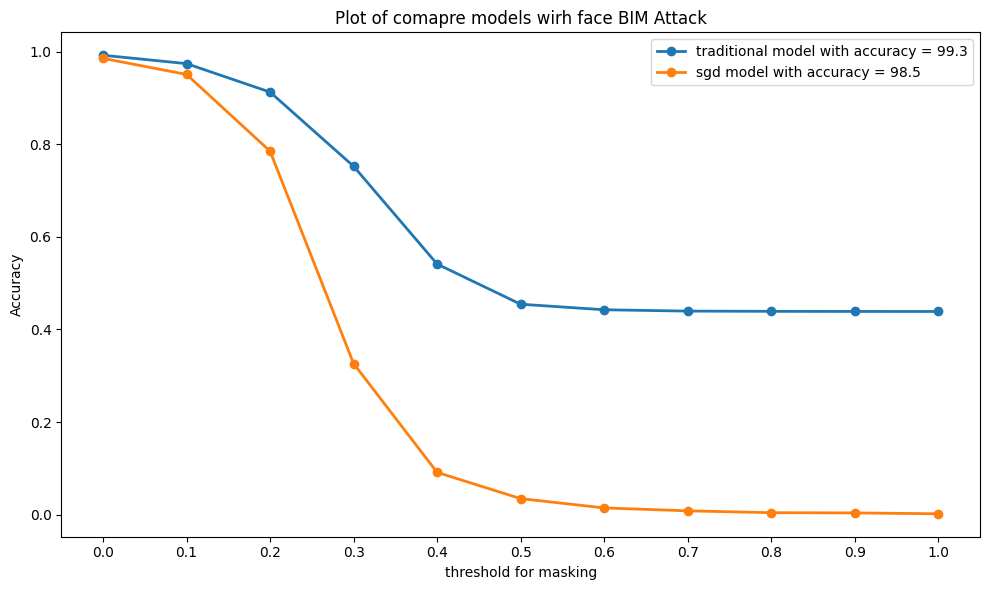

In [ ]:
import matplotlib.pyplot as plt

#x = [0.001, 0.005, 0.01, 0.03, 0.05, 0.1, 0.15, 0.2,0.3,0.5,1,2,3,4]
x = my_list
#t1 = [num / 10000 for num in training]
#i1 = [num / 10000 for num in important]
y2 = [(10000 - num) / 10000 for num in num_true_list]
y3 = [(10000 - num) / 10000 for num in num_true_saliency_list]
#y4 = [num / 10000 for num in num_true_list_saliency_2]

plt.figure(figsize=(10,6), tight_layout=True)
#plt.plot(x, t1, 'o-', linewidth=2, label='training')
#plt.plot(x, i1, 'o-', linewidth=2, label='masking important number')
plt.plot(x, y2, 'o-', linewidth=2, label='traditional model with accuracy = 99.3')
plt.plot(x, y3, 'o-', linewidth=2, label='sgd model with accuracy = 98.5')
#plt.plot(x, y4, 'o-', linewidth=2, label='sgd model with accuracy = 98.8')

plt.xticks(x)
plt.xlabel('threshold for masking')
plt.ylabel('Accuracy')
plt.title('Plot of comapre models wirh face BIM Attack')
plt.legend()

plt.show()

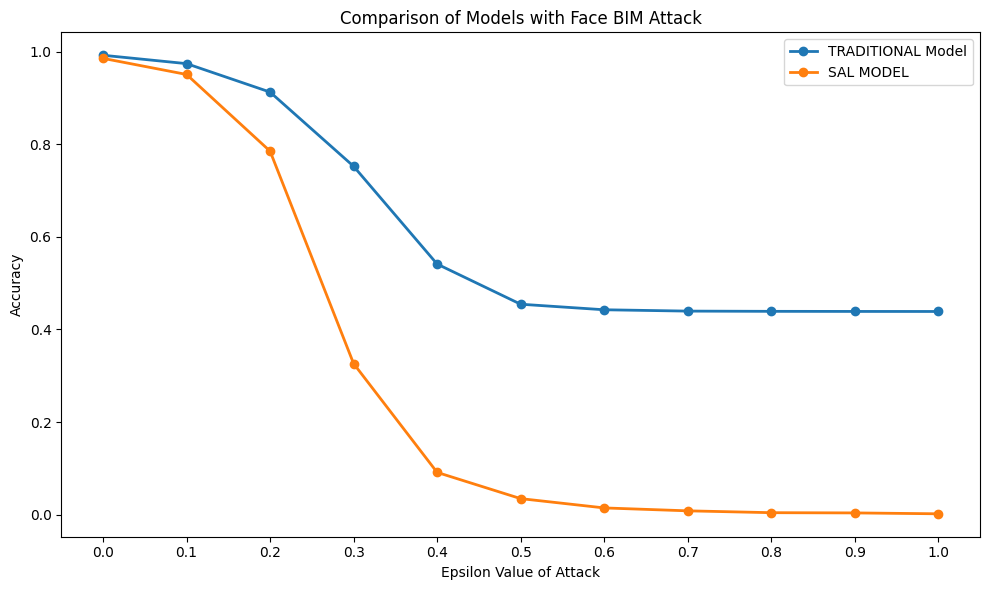

In [ ]:
import matplotlib.pyplot as plt

#x = [0.001, 0.005, 0.01, 0.03, 0.05, 0.1, 0.15, 0.2,0.3,0.5,1,2,3,4]
x= my_list
#t1 = [num / 10000 for num in training]
#i1 = [num / 10000 for num in important]
y2 = [(10000 - num) / 10000 for num in num_true_list]
y3 = [(10000 - num) / 10000 for num in num_true_saliency_list]
#y4 = [num / 10000 for num in num_true_list_saliency_2]

plt.figure(figsize=(10,6), tight_layout=True)
#plt.plot(x, t1, 'o-', linewidth=2, label='training')
#plt.plot(x, i1, 'o-', linewidth=2, label='masking important number')
plt.plot(x, y2, 'o-', linewidth=2, label='TRADITIONAL Model')
plt.plot(x, y3, 'o-', linewidth=2, label='SAL MODEL')
#plt.plot(x, y4, 'o-', linewidth=2, label='sgd model with accuracy = 98.8')


#plt.plot(x, y2, 'o-', linewidth=2, label='TRADITIONAL model with accuracy = 99.3')
#plt.plot(x, y3, 'o-', linewidth=2, label='SAL MODEL with accuracy = 98.8')

plt.xticks(x)
plt.xlabel('Epsilon Value of Attack')
plt.ylabel('Accuracy')
plt.title('Comparison of Models with Face BIM Attack')
plt.legend()

plt.show()

In [ ]:
import torch

# Assuming you have a tensor named 'tensor' with shape (2000,) containing boolean values

# Count the number of True values in the tensor
for l in range(14):
    num_true_saliency = torch.sum(successs_saliency[l]).item()
    print("Number of True values:", num_true_saliency)

Number of True values: 147.0
Number of True values: 158.0
Number of True values: 156.0
Number of True values: 220.0
Number of True values: 246.0
Number of True values: 417.0
Number of True values: 725.0
Number of True values: 1096.0
Number of True values: 2197.0
Number of True values: 4579.0
Number of True values: 6811.0
Number of True values: 7946.0
Number of True values: 8478.0
Number of True values: 8485.0


In [ ]:
imagesss, labelsss = ep.astensors(*samples(fmodel_saliency, dataset="MNIST", batchsize=2000))

/usr/local/lib/python3.10/dist-packages/foolbox/utils.py:80: UserWarning: samples() has only 20 samples and repeats itself if batchsize > 20
  warnings.warn(


In [ ]:
import torch

# Assuming your list of images is stored in the variable "images"
#images = torch.randn(10000, 1, 28, 28)
print(imagesss.shape)
pic = torch.zeros((2000, 1, 28, 28))

for m in range(2000):
  for i in range(1):
    for j in range(28):
      for k in range(28):
        pic[m][i][j][k]=imagesss[m][i][j][k].item()


torch.Size([2000, 1, 28, 28])


In [ ]:
# Calculate the mean
mean = torch.mean(pic)

# Print the mean
print("Mean:", mean.item())

Mean: 0.41446569561958313


In [ ]:
# Calculate the mean
std = torch.std(pic)

# Print the mean
print("std:", std.item())

std: 1.097611427307129


In [ ]:
# Calculate the mean
min = torch.min(pic)

# Print the mean
print("min:", min.item())

std: -0.4242129623889923


In [ ]:
# Calculate the mean
max = torch.max(pic)

# Print the mean
print("max:", max.item())

max: 2.821486711502075


In [ ]:
import numpy as np

def min_max_scale(image, min1, max1, min2, max2):
    # Convert image to numpy array
    image_array = np.array(image)

    # Scale the image to the range [0, 1]
    scaled_image = (image_array - min1) / (max1 - min1)

    # Scale the image to the new range [min2, max2]
    scaled_image = (scaled_image * (max2 - min2)) + min2

    return scaled_image

# Example usage
# Assuming you have an image tensor named 'image' with shape (28, 28)

# Define the current minimum and maximum values
current_min = min1
current_max = max1

# Define the new minimum and maximum values
new_min = -0.4242129623889923
new_max = 2.821486711502075

# Perform min-max scaling on the image tensor
scaled_image = min_max_scale(imagesss, current_min, current_max, new_min, new_max)


In [ ]:
clean_acc = accuracy(fmodel, pic, labelsss)
print(f"clean accuracy: {clean_acc * 100:.1f}%")

clean accuracy: 10.0%


In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy, samples
import foolbox as fb

fmodell = PyTorchModel(model_without, bounds=(0, 1), )

imagess, labelss = ep.astensors(*samples(fmodel, dataset="MNIST", batchsize=2000))

print("images.shape", imagess.shape)
print("labels.shape", labelss.shape)

#Mean: tensor(0.2549)
#Standard Deviation: tensor(1.2192)

#mean_images = (0.2549 - 0.1673)
#std_images = (0.2696/1.2192)

mean__images =  0.45
std__images = 3.1

normalized_images = (imagess - mean__images) / std__images

normalized_images = (imagess *  std__images)  - mean__images


clean_acc = accuracy(fmodel, normalized_images, labelss)
print(f"clean accuracy: {clean_acc * 100:.1f}%")

images.shape torch.Size([2000, 1, 28, 28])
labels.shape torch.Size([2000])
clean accuracy: 10.0%


In [ ]:
import numpy as np

def change_image_statistics(image, mean1, min1, max1, std1, mean2, min2, max2, std2):
    # Normalize image tensor
    image_normalized = (image - mean1) / std1

    # Rescale image tensor
    image_rescaled = (image_normalized * std2) + mean2

    # Clip pixel values to desired range
    image_rescaled = np.clip(image_rescaled, min2, max2)
    # Calculate the mean
    image_rescaled_min = torch.min(image_rescaled)
    image_rescaled_max = torch.max(image_rescaled)

    # Print the min and max
    print("image_rescaled_min:", image_rescaled_min.item())
    print("image_rescaled_max:", image_rescaled_max.item())

    return image_rescaled

# Assuming you have an image tensor of shape (28, 28)
image = pic

# Define the current statistics
mean1 = mean
min1 = min
max1 = max
std1 = std

# Define the desired statistics
mean2 = mean_t
min2 = min_t
max2 = max_t
std2 = std_t

# Change image statistics
modified_image = change_image_statistics(image, mean1, min1, max1, std1, mean2, min2, max2, std2)


image_rescaled_min: -0.2048330157995224
image_rescaled_max: 0.6217069625854492


In [ ]:
clean_acc = accuracy(fmodel, modified_image, labelss)
print(f"clean accuracy: {clean_acc * 100:.1f}%")

clean accuracy: 10.0%


In [ ]:
normalized_images[0]

tensor([[[-0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641],
         [-0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641],
         [-0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641],
         [-0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641, -0.7641,
          -0.7641, -0.7641, -0.7641, -0.7641, -0

In [ ]:
import torch
import torchvision.transforms as transforms
"""
# Assuming you have a tensor named 'image' with shape (channels, height, width)
# Convert the tensor to a PIL image
to_pil = transforms.ToPILImage()
pil_image = to_pil(image)

# Resize the PIL image to (28, 28)
resized_image = pil_image.resize((28, 28), Image.BILINEAR)

# Convert the resized PIL image back to a tensor
to_tensor = transforms.ToTensor()
resized_tensor = to_tensor(resized_image)

# Calculate the mean, min, max, and std of the resized tensor
mean = resized_tensor.mean()
min_value = resized_tensor.min()
max_value = resized_tensor.max()
std = resized_tensor.std()

"""
# Normalize the resized tensor to have mean=mean1 and std=std1
normalized_tensor = (pic - mean) / std

# Adjust the statistics of the normalized tensor
adjusted_tensor = (normalized_tensor * std2) + mean2
adjusted_tensor = torch.clamp(adjusted_tensor, min2, max2)

# Rescale the tensor back to the original range
rescaled_tensor = ((adjusted_tensor - mean2) * (max1 - min1) / (max2 - min2)) + mean1
rescaled_tensor = torch.clamp(rescaled_tensor, min1, max1)


In [ ]:
import torch

# Assuming you have a tensor of images with shape [num_images, 28, 28]
#images = torch.randn(num_images, 28, 28)

# Calculate the current mean and standard deviation
#current_mean = torch.mean(images)
#current_std = torch.std(images)
current_mean = 0.25839686393737793
current_std = 0.338174045085907

# Set the target mean and standard deviation
target_mean = 0.005889657884836197
target_std = 1.007725715637207

# Normalize the images to the target mean and standard deviation
normalized_images = (pic - current_mean) * (target_std / current_std) + target_mean

# Print the new mean and standard deviation
new_mean = torch.mean(normalized_images)
new_std = torch.std(normalized_images)
print("New Mean:", new_mean.item())
print("New Standard Deviation:", new_std.item())

New Mean: 0.005889667198061943
New Standard Deviation: 1.007725715637207


In [ ]:
clean_acc = accuracy(fmodel, normalized_images, labelss)
print(f"clean accuracy: {clean_acc * 100:.1f}%")

clean accuracy: 0.0%


In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy
import foolbox as fb
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import numpy as np
import torch

# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST test dataset with the defined transform
test_dataset = MNIST(root='path/to/dataset', train=False, download=True, transform=transform)

# Create a PyTorch model
model = model_without  # Your MNIST model initialization here

# Create the Foolbox model
fmodel = PyTorchModel(model, bounds=(0, 1))

# Prepare the test samples
images = []
labels = []
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    images.append(image)
    labels.append(label)

# Convert the test samples to PyTorch tensors
images_ = torch.stack(images)
labels_ = torch.tensor(labels)

# Convert the PyTorch tensors to eagerpy tensors
images__ = ep.astensor(images_)
labels__ = ep.astensor(labels_)
print("images.shape", images__.shape)
print("labels.shape", labels__.shape)

# Calculate clean accuracy
clean_acc = accuracy(fmodel, images__, labels__)
print(f"Clean accuracy: {clean_acc * 100:.1f}%")


images.shape torch.Size([10000, 1, 28, 28])
labels.shape torch.Size([10000])
Clean accuracy: 99.3%


In [ ]:
import torch

# Assuming your list of images is stored in the variable "images"
#images = torch.randn(10000, 1, 28, 28)

# Reshape the images tensor to flatten the spatial dimensions
images_flat = image.view(-1, 28*28)

# Calculate the mean and standard deviation
mean = torch.mean(images_flat)#, dim=0)
std = torch.std(images_flat)#, dim=0)

# Print the mean and standard deviation
print("Mean:", mean)
print("Standard Deviation:", std)


Mean: tensor(0.2549)
Standard Deviation: tensor(1.2192)


In [ ]:
images[0].max

In [ ]:
imagess[0].max

In [ ]:
import torch

# Assuming your list of images is stored in a tensor called "images"
# images.shape = torch.Size([10000, 1, 28, 28])

# Reshape the tensor to [num_images, num_pixels]
reshaped_images = images.view(images.size(0), -1)

# Calculate the mean and std
mean = torch.mean(reshaped_images.float(), dim=0)
std = torch.std(reshaped_images.float(), dim=0)

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std)


AttributeError: ignored

In [ ]:
import numpy as np

# Assuming your list of images is called "image_list"
# Convert the list of images to a NumPy array
image_array = np.array(images)

# Reshape the array to have shape (num_images, num_channels, height, width)
image_array = image_array.reshape(-1, 1, 28, 28)

# Calculate the mean and standard deviation along the axis of the images
mean_images = np.mean(image_array, axis=0)
std_images = np.std(image_array, axis=0)

# Print the results
print("Mean:", mean_images)
print("Standard Deviation:", std_images)


TypeError: ignored

In [ ]:
import numpy as np

# Assuming your list of images is called "image_list"
# Convert the list of images to a NumPy array
image_array = np.array(images)

# Reshape the array to have shape (num_images, num_channels, height, width)
image_array = image_array.reshape(-1, 1, 28, 28)

# Convert the NumPy array to a PyTorch tensor
image_tensor = torch.from_numpy(image_array)

# Calculate the mean and standard deviation along the axis of the images
mean_images = torch.mean(image_tensor, dim=0)
std_images = torch.std(image_tensor, dim=0)

# Print the results
print("Mean:", mean_images)
print("Standard Deviation:", std_images)


TypeError: ignored

In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy, samples
import foolbox as fb

fmodel = PyTorchModel(model_without, bounds=(0, 1))

imagess, labelss = ep.astensors(*samples(fmodel, dataset="MNIST", batchsize=10000))

print("images.shape", imagess.shape)
print("labels.shape", labelss.shape)

#Mean: tensor(0.2549)
#Standard Deviation: tensor(1.2192)

#mean_images = (0.2549 - 0.1673)
#std_images = (0.2696/1.2192)

mean__images =  0.45
std__images = 3.1

normalized_images = (imagess - mean_images) / std_images

normalized_images = (imagess *  std_images)  - mean__images


clean_acc = accuracy(fmodel, normalized_images, labelss)
print(f"clean accuracy: {clean_acc * 100:.1f}%")


/usr/local/lib/python3.10/dist-packages/foolbox/utils.py:80: UserWarning: samples() has only 20 samples and repeats itself if batchsize > 20
  warnings.warn(


images.shape torch.Size([10000, 1, 28, 28])
labels.shape torch.Size([10000])
clean accuracy: 25.0%


In [ ]:
import torch

# Assuming your list of images is stored in the variable "images"
#images = torch.randn(10000, 1, 28, 28)
print(imagess.shape)
pic = torch.zeros((10000, 1, 28, 28))

for m in range(10000):
  for i in range(1):
    for j in range(28):
      for k in range(28):
        pic[m][i][j][k]=imagess[m][i][j][k].item()



torch.Size([10000, 1, 28, 28])


In [ ]:
# Calculate the mean
mean = torch.mean(pic)

# Print the mean
print("Mean:", mean.item())

In [ ]:
# Calculate the mean
std = torch.std(pic)

# Print the mean
print("std:", std.item())

In [ ]:
import torch

# Assuming you have a tensor of images with shape [num_images, 28, 28]
#images = torch.randn(num_images, 28, 28)

# Calculate the current mean and standard deviation
#current_mean = torch.mean(images)
#current_std = torch.std(images)
current_mean = 0.2584
current_std = 0.3382

# Set the target mean and standard deviation
target_mean = 0.0058
target_std = 1.0077

# Normalize the images to the target mean and standard deviation
normalized_images = (pic - current_mean) * (target_std / current_std) + target_mean

# Print the new mean and standard deviation
new_mean = torch.mean(normalized_images)
new_std = torch.std(normalized_images)
print("New Mean:", new_mean.item())
print("New Standard Deviation:", new_std.item())


New Mean: 0.00579069135710597
New Standard Deviation: 1.0076225996017456


In [ ]:
clean_acc = accuracy(fmodel, pic, labelss[0:2000])
print(f"clean accuracy: {clean_acc * 100:.1f}%")

clean accuracy: 0.0%


In [ ]:
clean_acc = accuracy(fmodel, normalized_images, labelss[0:2000])
print(f"clean accuracy: {clean_acc * 100:.1f}%")

clean accuracy: 10.0%


In [ ]:
import torch

# Assuming your tensor of images is stored in the variable "images"
#images = torch.randn(500, 1, 28, 28)

# Reshape the images tensor to flatten the spatial dimensions
images_flat = pic.view(500, -1)

# Calculate the mean and standard deviation
mean = torch.mean(images_flat, dim=0)
std = torch.std(images_flat, dim=0)

# Print the mean and standard deviation
print("Mean:", mean)
print("Standard Deviation:", std)


Mean: tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 3.9216e-04, 0.0000e+00, 1.9608e-04,
        1.9608e-04, 0.0000e+00, 7.8431e-04, 1.7843e-02, 1.3529e-01, 2.0412e-01,
        2.1000e-01, 2.0549e-01, 2.1294e-01, 2.2275e-01, 2.7235e-01, 2.1039e-01,
        1.2314e-01, 4.6667e-02, 0.0000e+00, 3.9216e-04, 0.0000e+00, 1.9608e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.9608e-04, 3.9216e-04, 3.9216e-04, 1.5686e-03, 2.4902e-02,
        7.2941e-02, 1.9765e-01, 4.5392e-01, 5.3765e-01, 5.5882e-01, 5.7314e-01,
        5.8039e-01, 5.6804e-01, 5.7118e-01, 4.7510e-01, 3.8608e-01, 2.4118e-01,
        5.5882e-02, 1.5686e-03, 3.9216e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.8824e-04, 9.8039e-03, 7.6863e-02, 1.4020e-01, 1.6804e-01, 2.5804e-01,
        4.5098e-01, 5.0725e-01, 4.9490e-01, 5.0000e-01, 5.2255e-01, 5.0549e-01,
        4.9882e-01, 4.4529e-01, 3.

In [ ]:
# Reshape the images tensor to flatten the spatial dimensions
images_flat = pic.view(-1, 28*28)

# Calculate the mean and standard deviation
mean = torch.mean(images_flat, dim=0)
std = torch.std(images_flat, dim=0)

# Print the mean and standard deviation
print("Mean:", mean)
print("Standard Deviation:", std)

Mean: 784
Standard Deviation: tensor([0.0000, 0.0000, 0.0000, 0.0017, 0.0000, 0.0009, 0.0009, 0.0000, 0.0020,
        0.0478, 0.2478, 0.2560, 0.2470, 0.2461, 0.2242, 0.2287, 0.2702, 0.2566,
        0.2427, 0.1582, 0.0000, 0.0017, 0.0000, 0.0009, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0012, 0.0012, 0.0049, 0.0963,
        0.1844, 0.2985, 0.4198, 0.4108, 0.4285, 0.4306, 0.4320, 0.4295, 0.4300,
        0.3743, 0.4002, 0.2928, 0.1174, 0.0049, 0.0017, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0019, 0.0428, 0.1919,
        0.2790, 0.3053, 0.3120, 0.3754, 0.3728, 0.3784, 0.3848, 0.4001, 0.3908,
        0.3614, 0.3499, 0.3589, 0.3116, 0.3177, 0.2833, 0.0956, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0019, 0.0026, 0.1955,
        0.2913, 0.2845, 0.2837, 0.3053, 0.3605, 0.3811, 0.3779, 0.3682, 0.3809,
        0.3704, 0.3867, 0.3662, 0.3621, 0.3024, 0.2764, 0.3118, 0.2581, 0.0590,
        0.

In [ ]:
# Reshape the images tensor to flatten the spatial dimensions
images_flat = pic[0].view(-1, 28*28)

# Calculate the mean and standard deviation
mean = torch.mean(images_flat)#, dim=0)
std = torch.std(images_flat)#, dim=0)

# Print the mean and standard deviation
print("Mean:", mean)
print("Standard Deviation:", std)


In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy, samples
import foolbox as fb

fmodel = PyTorchModel(model_without, bounds=(0, 1))

imagess, labelss = ep.astensors(*samples(fmodel, dataset="MNIST", batchsize=1000))

print("images.shape", imagess.shape)
print("labels.shape", labelss.shape)



mean_images = 0.25
std_images = 1.2


normalized_images = (imagess - mean_images) / std_images


clean_acc = accuracy(fmodel, normalized_images, labelss)
print(f"clean accuracy: {clean_acc * 100:.1f}%")


/usr/local/lib/python3.10/dist-packages/foolbox/utils.py:80: UserWarning: samples() has only 20 samples and repeats itself if batchsize > 20
  warnings.warn(


images.shape torch.Size([1000, 1, 28, 28])
labels.shape torch.Size([1000])
clean accuracy: 10.0%


In [ ]:
imagess

In [ ]:
max(images__[0])

PyTorchTensor(tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                       -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                       -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                       -0.4242, -0.4242, -0.4242, -0.4242],
                      [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                       -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                       -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                       -0.4242, -0.4242, -0.4242, -0.4242],
                      [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                       -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                       -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                       -0

In [ ]:
(images__[0])

PyTorchTensor(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
                       [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
                       [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
                        -0.4242, -0.4242,

In [ ]:
imagess[0]*3.2 - 0.42

PyTorchTensor(tensor([[[-0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200,
                        -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200,
                        -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200,
                        -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200],
                       [-0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200,
                        -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200,
                        -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200,
                        -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200],
                       [-0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200,
                        -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200,
                        -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200, -0.4200,
                        -0.4200, -0.4200,

In [ ]:
imagess[0]

PyTorchTensor(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000],
                       [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000],
                       [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000],
                       [0.0000, 0.000

In [ ]:
imagess[0]

PyTorchTensor(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000],
                       [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000],
                       [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                        0.0000, 0.0000, 0.0000, 0.0000],
                       [0.0000, 0.000

In [ ]:
images[0] == imagess[0]

PyTorchTensor(tensor([[[False, False, False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False],
                       [False, False, False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False],
                       [False, False, False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False],
                       [False, False, False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False, False, False,
     

In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy
import foolbox as fb
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import numpy as np
import torch
"""
# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
"""
# Load the MNIST test dataset with the defined transform
test_dataset = MNIST(root='path/to/dataset', train=False, download=True)#, transform=transform)

# Create a PyTorch model
model = model_without  # Your MNIST model initialization here

# Create the Foolbox model
fmodel = PyTorchModel(model, bounds=(0, 1))

# Prepare the test samples
images = []
labels = []
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    images.append(image)
    labels.append(label)

#print("images.shape", images.shape)
#print("labels.shape", labels.shape)

# Convert the test samples to PyTorch tensors
#images = torch.stack(images)
#labels = torch.tensor(labels)

# Convert the PyTorch tensors to eagerpy tensors
#images = ep.astensor(images)
#labels = ep.astensor(labels)

images = torch.tensor(images)
labels = torch.tensor(labels)

# Calculate clean accuracy
clean_acc = accuracy(fmodel, images, labels)
print(f"Clean accuracy: {clean_acc * 100:.1f}%")


RuntimeError: ignored

In [ ]:
import torch
import eagerpy as ep
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.models import resnet50
from foolbox import PyTorchModel, accuracy

# Load the MNIST test dataset with the defined transform
test_dataset = MNIST(root='path/to/dataset', train=False, download=True, transform=ToTensor())

# Create a PyTorch model
model = resnet50(pretrained=True)

# Create the Foolbox model
fmodel = PyTorchModel(model, bounds=(0, 1))

# Prepare the test samples
images = []
labels = []
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    images.append(image)
    labels.append(label)

# Convert the test samples to PyTorch tensors
images = torch.stack(images)
labels = torch.tensor(labels)

# Convert the PyTorch tensors to eagerpy tensors
images = ep.astensor(images, device="cuda")
labels = ep.astensor(labels, device="cuda")

# Calculate clean accuracy
clean_acc = accuracy(fmodel, images, labels)
print(f"Clean accuracy: {clean_acc * 100:.1f}%")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 129MB/s]
/usr/local/lib/python3.10/dist-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set

TypeError: ignored

In [ ]:
import eagerpy as ep
from foolbox import PyTorchModel, accuracy, samples
from foolbox.attacks import LinfPGD
import foolbox as fb

fmodel = fb.PyTorchModel(model_without)

images, labels = ep.astensors(*samples(fmodel, dataset="MNIST", batchsize=1000))
print(images.shape)
print(labels.shape)

clean_acc = accuracy(fmodel, images, labels)
print(f"clean accuracy:  {clean_acc * 100:.1f} %")


TypeError: ignored

In [ ]:
images.shape

torch.Size([10000, 1, 28, 28])

In [ ]:
labels.shape

torch.Size([10000])

In [ ]:
# Modify the verify_input_bounds function
def verify_input_bounds(input: ep.Tensor, model) -> None:
    pass

fb.attacks.base.verify_input_bounds = verify_input_bounds

# Perform the attack
attack = fb.attacks.FGSM()
epsilons = [0.00000005]
advss, advs, success = attack(fmodel, images, labels, epsilons=epsilons)

In [ ]:
# Perform the attack
attack = fb.attacks.FGSM()
epsilons = [0.005]
advss, advs, success = attack(fmodel, images, labels, epsilons=epsilons)

AssertionError: ignored

In [ ]:
import eagerpy as ep
import torch
import torchvision.transforms as transforms
from foolbox import PyTorchModel, accuracy, samples
import foolbox as fb

# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

fmodel = fb.models.PyTorchModel(model_without, bounds=(0, 1))

images, labels = ep.astensors(*samples(fmodel, dataset="MNIST", batchsize=1000))

clean_acc = accuracy(fmodel, images, labels)
print(f"clean accuracy: {clean_acc * 100:.1f}%")


/usr/local/lib/python3.10/dist-packages/foolbox/utils.py:80: UserWarning: samples() has only 20 samples and repeats itself if batchsize > 20
  warnings.warn(


clean accuracy: 0.0%


In [ ]:
import eagerpy as ep
import torch
import torchvision.transforms as transforms
from foolbox import PyTorchModel, accuracy, samples
import foolbox as fb

# Define the transform for test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

fmodel = PyTorchModel(model_without, bounds=(0, 1))

images, labels = ep.astensors(*samples(fmodel, dataset="MNIST", batchsize=1000))

# Apply the transform to the images
pil_images = [transforms.ToPILImage()(image.raw) for image in images]
transformed_images = [transform(image) for image in pil_images]
images = ep.astensors(*transformed_images)

clean_acc = accuracy(fmodel, images, labels)
print(f"clean accuracy: {clean_acc * 100:.1f}%")


ValueError: ignored